In [3]:
help(range)

In [5]:
a <- c('a','b','c')

In [26]:
a[c(2:4)]

[1] "b" "c" NA

In [24]:
b<-c(2:4)

In [25]:
b

[1] 2 3 4

In [29]:
a[c(0)]

character(0)

In [34]:
y<-matrix(1:20,ncol = 4,nrow = 5)

In [44]:
y[2]

[1] 2

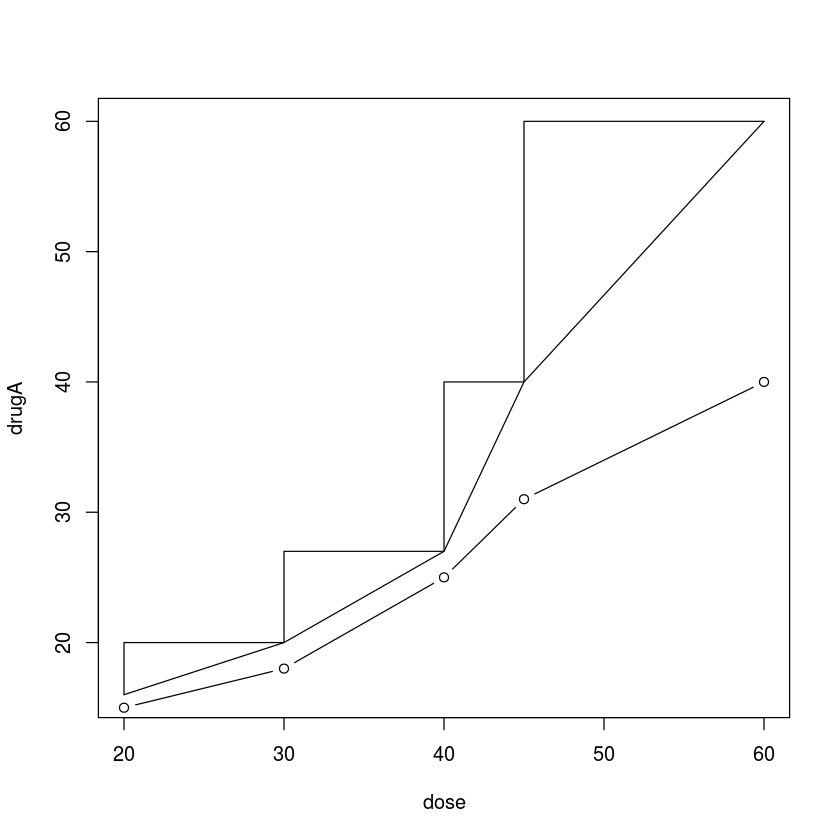

In [56]:
dose <- c(20,30,40,45,60)
drugA <- c(16,20,27,40,60)
drugB <- c(15,18,25,31,40)


plot(dose,drugA,type='S')
lines(dose,drugB,type='b')
lines(dose,drugA,type='l')

In [46]:
help(plot)

In [1]:
cat("model
    {

    for ( i in 1:N ) {
    
    P[i] <- 1/V[i]
    
    y[i] ~ dnorm( d, P[i] )

    }

    ### Define the priors
    d ~ dnorm( 0, 0.00001 )

    ### Transform the ln(OR) to OR
    OR <- exp( d )

    }", file="aspirinFE.txt")

In [2]:
library(rjags)
library(coda)

Loading required package: coda
Linked to JAGS 4.1.0
Loaded modules: basemod,bugs


In [4]:
data <- read.csv('data1.csv')
head(data)

N,y,V
1,0.3289011,0.0388957
2,0.3845458,0.0411673
3,0.2195622,0.0204915
4,0.2222206,0.0647646
5,0.2254672,0.0351996
6,-0.1246363,0.0096167


In [5]:
N <- length(data$y)

In [6]:
dat <- list("N" = N,"y" = data$y,"V" = data$V)
inits <- list(d=0.0)

In [8]:
jags.m <- jags.model(file = 'aspirinFE.txt' , data = dat, inits = inits, n.chains = 1, n.adapt = 500)


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 7
   Unobserved stochastic nodes: 1
   Total graph size: 33

Initializing model



In [9]:
params <- c("d", "OR")

In [10]:
samps <- coda.samples( jags.m, params, n.iter=10000 )

In [11]:
summary(samps)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
OR 1.1153 0.03702 0.0003702      0.0003702
d  0.1086 0.03319 0.0003319      0.0003319

2. Quantiles for each variable:

      2.5%     25%    50%   75%  97.5%
OR 1.04550 1.08966 1.1148 1.140 1.1899
d  0.04449 0.08587 0.1087 0.131 0.1739


In [12]:
summary(window(samps, start=5001)) 


Iterations = 5001:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
OR 1.1152 0.03734 0.0005280      0.0005280
d  0.1085 0.03348 0.0004734      0.0004734

2. Quantiles for each variable:

      2.5%     25%    50%    75%  97.5%
OR 1.04550 1.08951 1.1146 1.1402 1.1906
d  0.04449 0.08573 0.1085 0.1312 0.1745


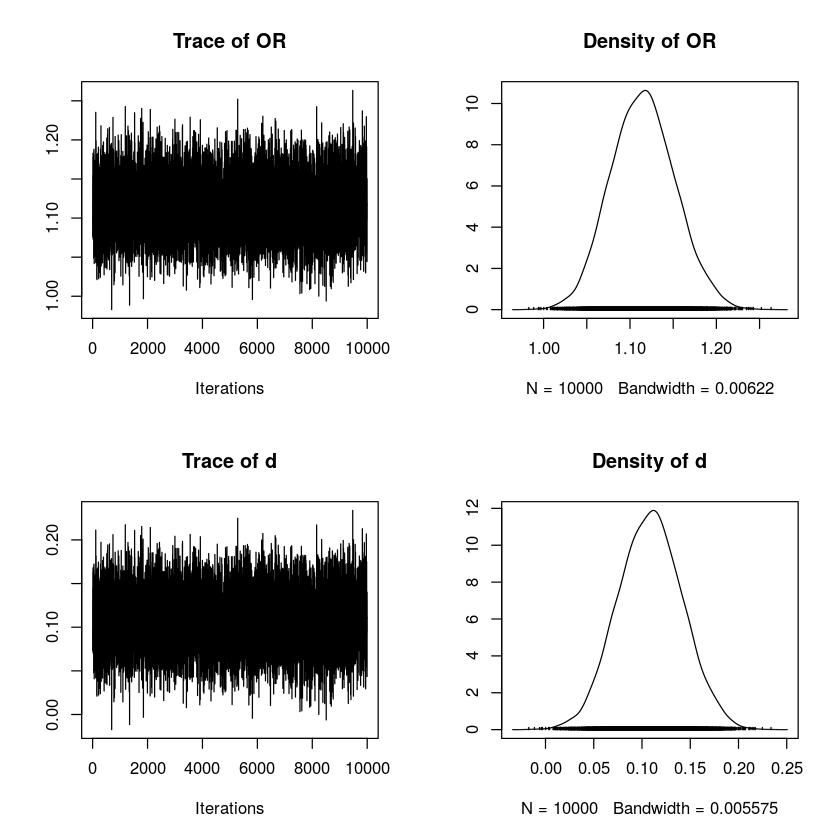

In [13]:
plot(samps)

In [14]:
help(gamma)

In [18]:
dgamma(0.001,0.001)

[1] 0.9926954

In [20]:
# samps